In [11]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import math
import tensorflow as tf

In [3]:
base_dir='./Covid19-dataset/'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # 타깃 디렉터리
    train_dir,
    # 모든 이미지를 150 x 150 크기로 바꾸기
    target_size=(150,150),
    batch_size=32,
    # categorical_crossentropy 손실을 사용
    class_mode='categorical' # COVID_19는 3개의 class 구성
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.
Found 83 images belonging to 3 classes.


In [36]:
input_shape = (150,150,3)
img_input = layers.Input(shape=input_shape)
output1 = layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu')(img_input)
output2 = layers.MaxPooling2D((2,2))(output1)
output3 = layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu')(output2)
output4 = layers.MaxPooling2D((2,2))(output3)
output5 = layers.Conv2D(kernel_size=(3,3), filters=128, activation='relu')(output4)
output6 = layers.MaxPooling2D((2,2))(output5)
output7 = layers.Conv2D(kernel_size=(3,3), filters=128, activation='relu')(output6)
output8 = layers.MaxPooling2D((2,2))(output7)
output9 = layers.Flatten()(output8)
output10 = layers.Dropout(0.5)(output9)
output11 = layers.Dense(512, activation='relu')(output10)
predictions = layers.Dense(3, activation='softmax')(output11)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 128)       7385

In [37]:
opt = SGD(lr=0.0005, momentum=0.9)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
model.compile(loss=loss, optimizer=opt, metrics=["accuracy"])

In [38]:
train_step = math.ceil(train_generator.n/32)
valid_step = math.ceil(validation_generator.n/32)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=valid_step)

C:\Users\user\AppData\Local\Temp\ipykernel_764\4154572522.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
8/8 [==============================] - 12s 2s/step - loss: 1.1060 - accuracy: 0.2789 - val_loss: 1.0953 - val_accuracy: 0.3133
Epoch 2/30
8/8 [==============================] - 13s 2s/step - loss: 1.1014 - accuracy: 0.2988 - val_loss: 1.0906 - val_accuracy: 0.5542
Epoch 3/30
8/8 [==============================] - 12s 2s/step - loss: 1.0950 - accuracy: 0.4382 - val_loss: 1.0858 - val_accuracy: 0.4940
Epoch 4/30
8/8 [==============================] - 13s 2s/step - loss: 1.0927 - accuracy: 0.4343 - val_loss: 1.0814 - val_accuracy: 0.4940
Epoch 5/30
8/8 [==============================] - 12s 2s/step - loss: 1.0852 - accuracy: 0.4622 - val_loss: 1.0771 - val_accuracy: 0.4940
Epoch 6/30
8/8 [==============================] - 13s 2s/step - loss: 1.0899 - accuracy: 0.4462 - val_loss: 1.0735 - val_accuracy: 0.4940
Epoch 7/30
8/8 [==============================] - 13s 2s/step - loss: 1.0836 - accuracy: 0.4462 - val_loss: 1.0707 - val_accuracy: 0.4940
Epoch 8/30
8/8 [==================

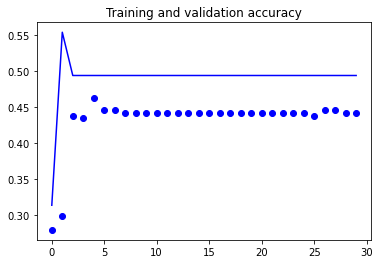

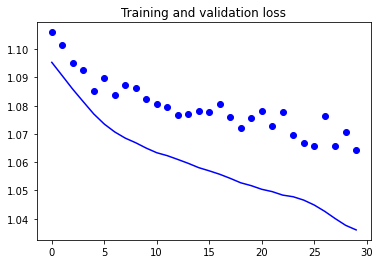

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.legend

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend

plt.show()

In [44]:
model.save('CNN_epoch_20.h5')

test_dir = os.path.join(base_dir, 'test')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_step = math.ceil(test_generator.n/32)

test_loss, test_acc = model.evaluate_generator(test_generator, steps= test_step, workers=4)
print(f'test loss : {test_loss:.4f} / test acc : {test_acc*100:.2f} %')

Found 66 images belonging to 3 classes.


C:\Users\user\AppData\Local\Temp\ipykernel_764\1433735074.py:14: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps= test_step, workers=4)


test loss : 1.0695 / test acc : 39.39 %


In [45]:
from tensorflow.keras.applications import VGG16

vgg_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape=(150,150,3))

58889256/58889256 [==============================] - 7s 0us/step


In [47]:
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [51]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(vgg_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=train_step,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=valid_step)

c:\Users\user\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


NameError: name 'train_labels' is not defined

# fine tuning

In [ ]:
for layer in vgg_base.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_base.layers[15:]:
    layer.trainable = True